In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/home/apprennant/Food Fact/Data/nutri_score.csv")
df.head()



,code,product_name,generic_name,quantity,countries,allergens,nutrition_grade_fr,main_category,energy_100g,energy-from-fat_100g,...,sodium_100g,folates_100g,potassium_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,Farine de blé noir,Unknown,1kg,FR,Unknown,u,Unknown,0.0,0.0,...,0.000,0.0,0.0,0.000,0.0,0.00000,0.0,0.0,0.0,0.0
1,4530,Banana Chips Sweetened (Whole),Unknown,Unknown,US,Unknown,d,Unknown,2243.0,0.0,...,0.000,0.0,0.0,0.000,0.0,0.00129,0.0,0.0,14.0,14.0
2,4559,Peanuts,Unknown,Unknown,US,Unknown,b,Unknown,1941.0,0.0,...,0.250,0.0,0.0,0.071,0.0,0.00129,0.0,0.0,0.0,0.0
3,16087,Organic Salted Nut Mix,Unknown,Unknown,US,Unknown,d,Unknown,2540.0,0.0,...,0.482,0.0,0.0,0.143,0.0,0.00514,0.0,0.0,12.0,12.0
4,16094,Organic Polenta,Unknown,Unknown,US,Unknown,u,Unknown,1552.0,0.0,...,0.000,0.0,0.0,0.000,0.0,0.00000,0.0,0.0,0.0,0.0


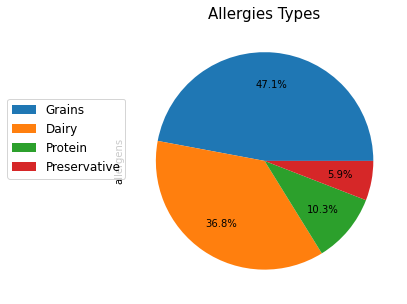

In [2]:
#Nutrition Grade
#Filter Unknown nutrition Grande
grade = df[df.allergens != 'Unknown']

labels = grade["allergens"].value_counts().index
values = grade["allergens"].value_counts()

grade['allergens'].value_counts(normalize=True).sort_index(ascending=False)

#fig, ax = plt.subplots()
values.plot.pie(autopct="%1.1f%%", pctdistance=0.7, figsize=(5,5), labels=None)
plt.title("Allergies Types", fontsize=15)
plt.legend(labels, bbox_to_anchor=(0.01, 0.75),
           fontsize=12)

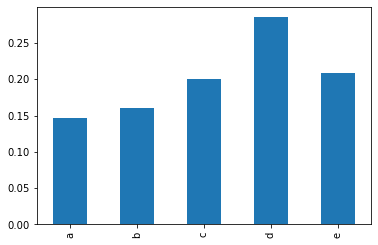

In [19]:
# nutrition_grade_fr 

#Filter Unknown Type
nutri = df[df.nutrition_grade_fr != 'u']
# nutri

s = nutri['nutrition_grade_fr'].value_counts(normalize=True).sort_index(ascending=True)
s.plot(kind='bar')
plt.show()

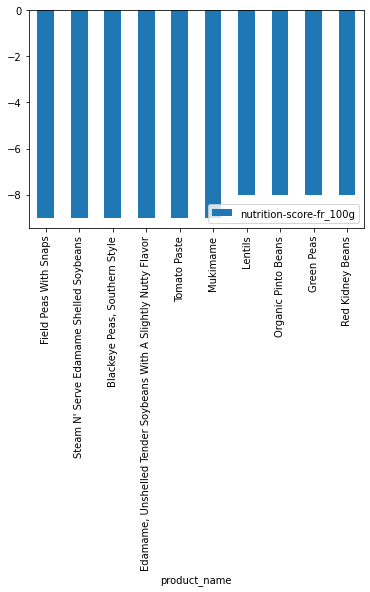

In [5]:
countriestop10_nutri = df[['product_name','nutrition-score-fr_100g']]
min_product = countriestop10_nutri.groupby('product_name').min()

min_product = countriestop10_nutri.sort_values(by="nutrition-score-fr_100g")
product = min_product.head(10)

product.plot(x = 'product_name', kind = 'bar')
plt.show()

<AxesSubplot:xlabel='nutrition-score-fr_100g'>

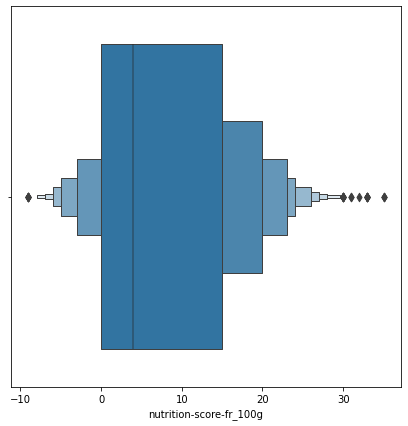

In [6]:
#Density of Nutrition Score in France

plt.figure(figsize = (7,7))
sns.boxenplot(x = df["nutrition-score-fr_100g"], k_depth='proportion')

<AxesSubplot:xlabel='energy_100g'>

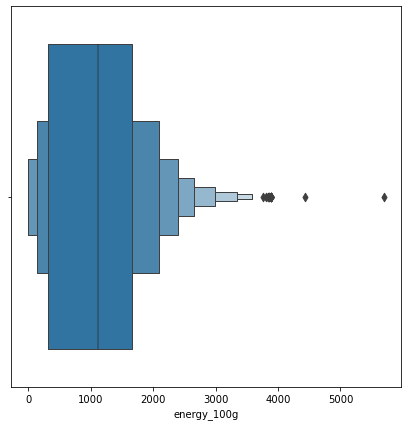

In [7]:
#Density of Energy 

plt.figure(figsize = (7,7))
sns.boxenplot(x = df["energy_100g"], k_depth='proportion')

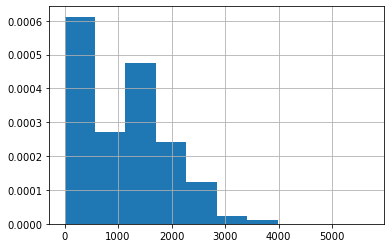

In [8]:
ax=df["energy_100g"].hist(density=True,bins=10)

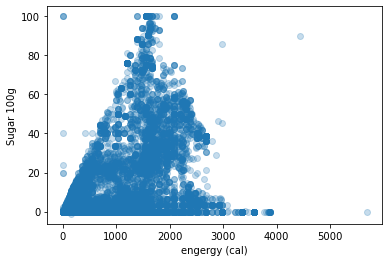

In [9]:
import scipy.stats as st
import numpy as np

plt.plot(df["energy_100g"],df["sugars_100g"],'o',alpha=0.25)
plt.xlabel("engergy (cal)")
plt.ylabel("Sugar 100g")
plt.show()

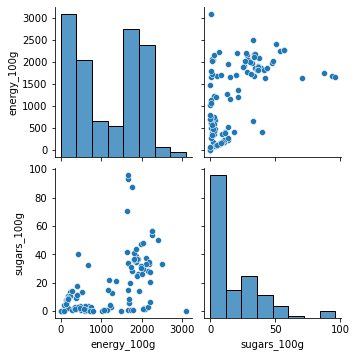

In [10]:
#Engergy, Sugar and Nutrition Grade in France
df2 = df[df.countries == 'FR']
df2 = df2[df2.nutrition_grade_fr != 'u']
df2 = df2[['countries','energy_100g','sugars_100g','nutrition_grade_fr']]
# df2

sns.pairplot(df2)


array([[<AxesSubplot:title={'center':'sugars_100g'}>,
        <AxesSubplot:title={'center':'salt_100g'}>]], dtype=object)

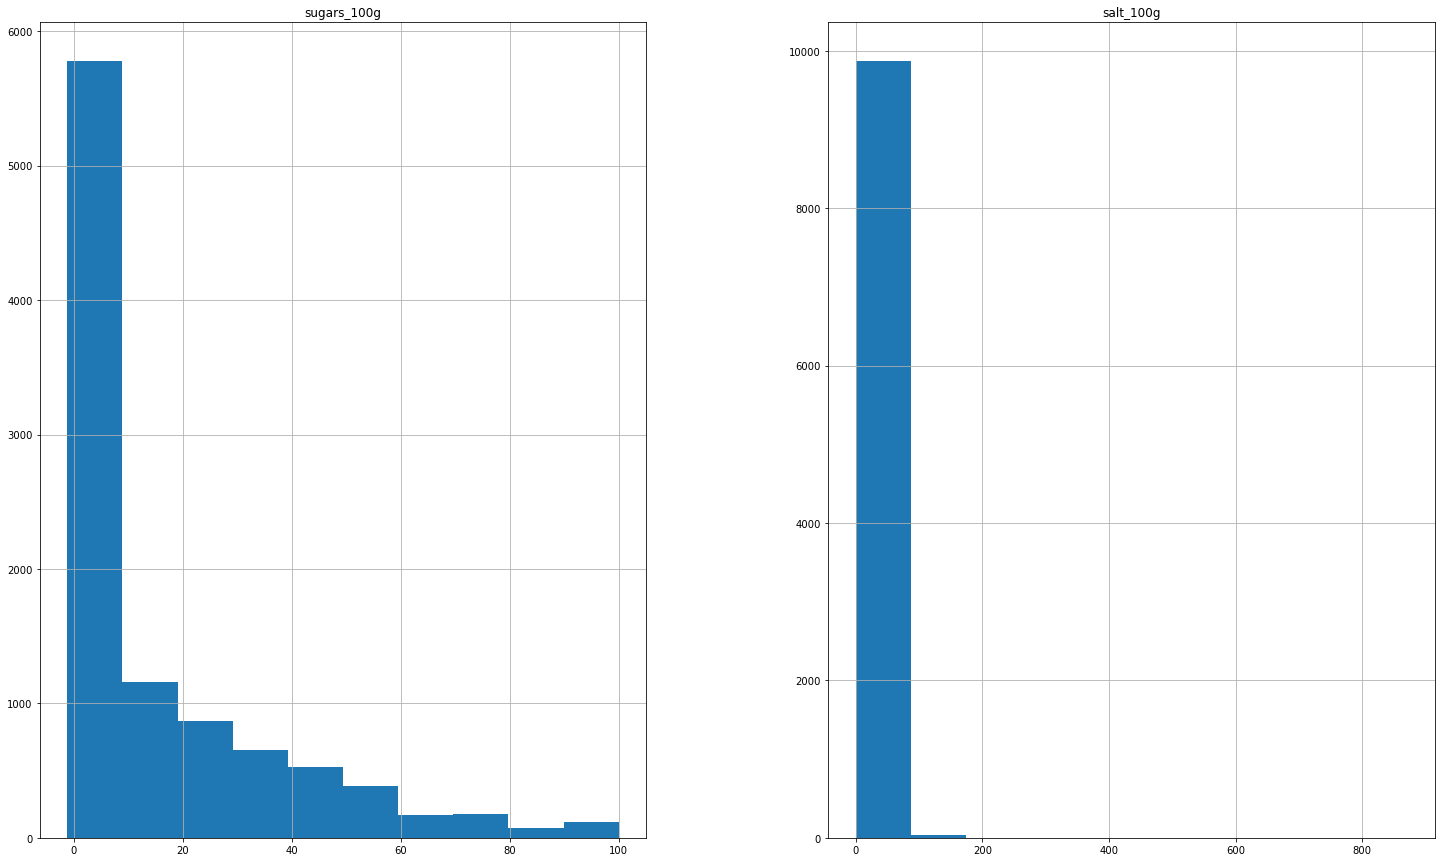

In [11]:
df3 = df[[ 'sugars_100g', 'salt_100g']]
df3.hist(figsize=(25,15))

In [12]:
s = df.select_dtypes(include = ['int64','float64'])
s.head()

,code,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,starch_100g,...,sodium_100g,folates_100g,potassium_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,0.0,0.0,0.00,0.00,0.0,0.000,0.00,0.00,0.0,...,0.000,0.0,0.0,0.000,0.0,0.00000,0.0,0.0,0.0,0.0
1,4530,2243.0,0.0,28.57,28.57,0.0,0.018,64.29,14.29,0.0,...,0.000,0.0,0.0,0.000,0.0,0.00129,0.0,0.0,14.0,14.0
2,4559,1941.0,0.0,17.86,0.00,0.0,0.000,60.71,17.86,0.0,...,0.250,0.0,0.0,0.071,0.0,0.00129,0.0,0.0,0.0,0.0
3,16087,2540.0,0.0,57.14,5.36,0.0,0.000,17.86,3.57,0.0,...,0.482,0.0,0.0,0.143,0.0,0.00514,0.0,0.0,12.0,12.0
4,16094,1552.0,0.0,1.43,0.00,0.0,0.000,77.14,0.00,0.0,...,0.000,0.0,0.0,0.000,0.0,0.00000,0.0,0.0,0.0,0.0


#### Create Histogram for Numberic Variables

-


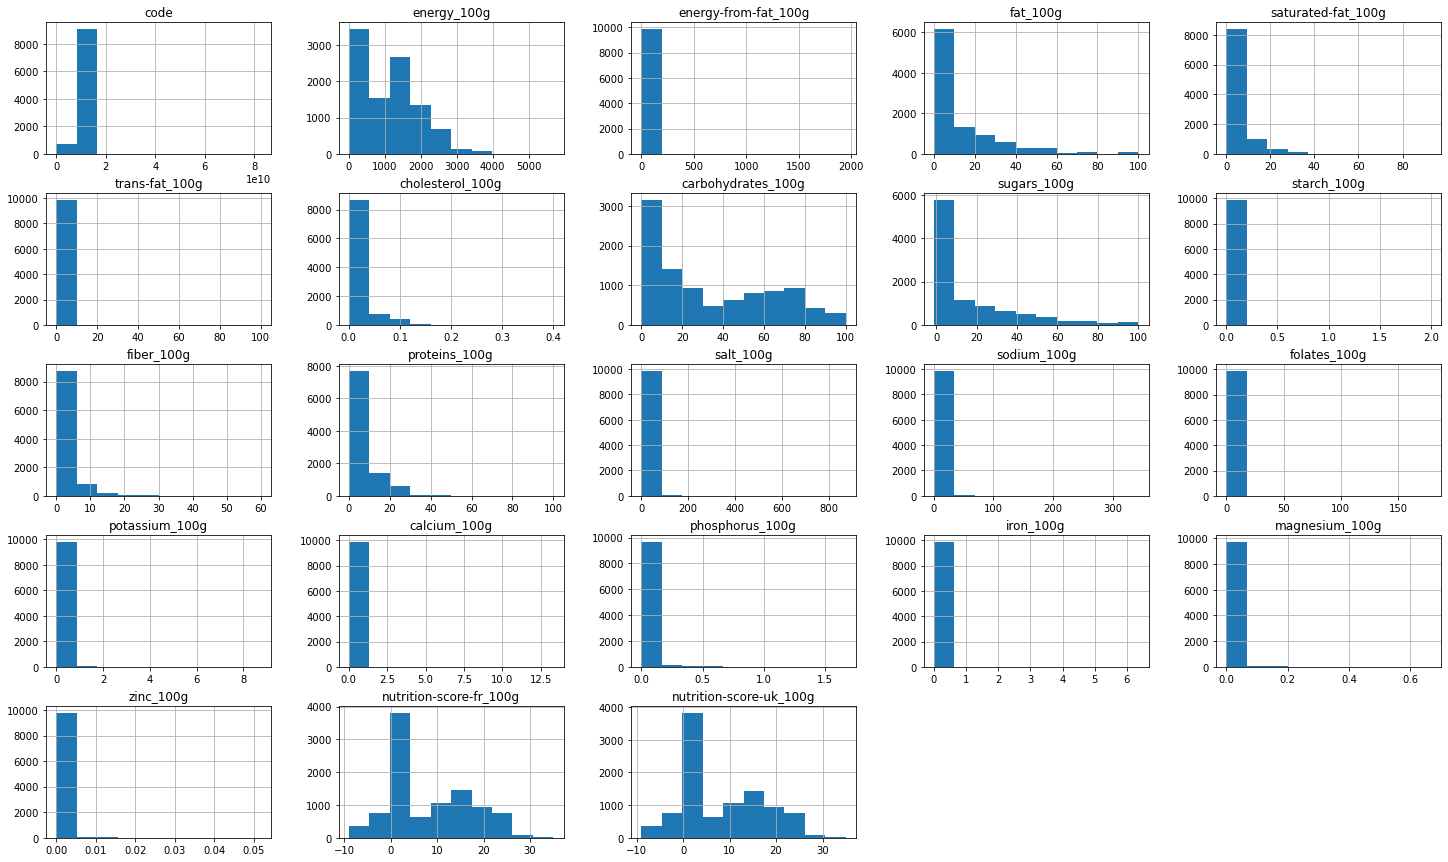

In [13]:
s.hist(figsize=(25,15))
print("-")

### Most corelative with Nutrition Score in France

In [15]:
s.corr().sort_values('nutrition-score-fr_100g', ascending=False).index[:11]

Index(['nutrition-score-fr_100g', 'nutrition-score-uk_100g', 'energy_100g',
       'saturated-fat_100g', 'fat_100g', 'sugars_100g', 'carbohydrates_100g',
       'cholesterol_100g', 'proteins_100g', 'calcium_100g', 'trans-fat_100g'],
      dtype='object')

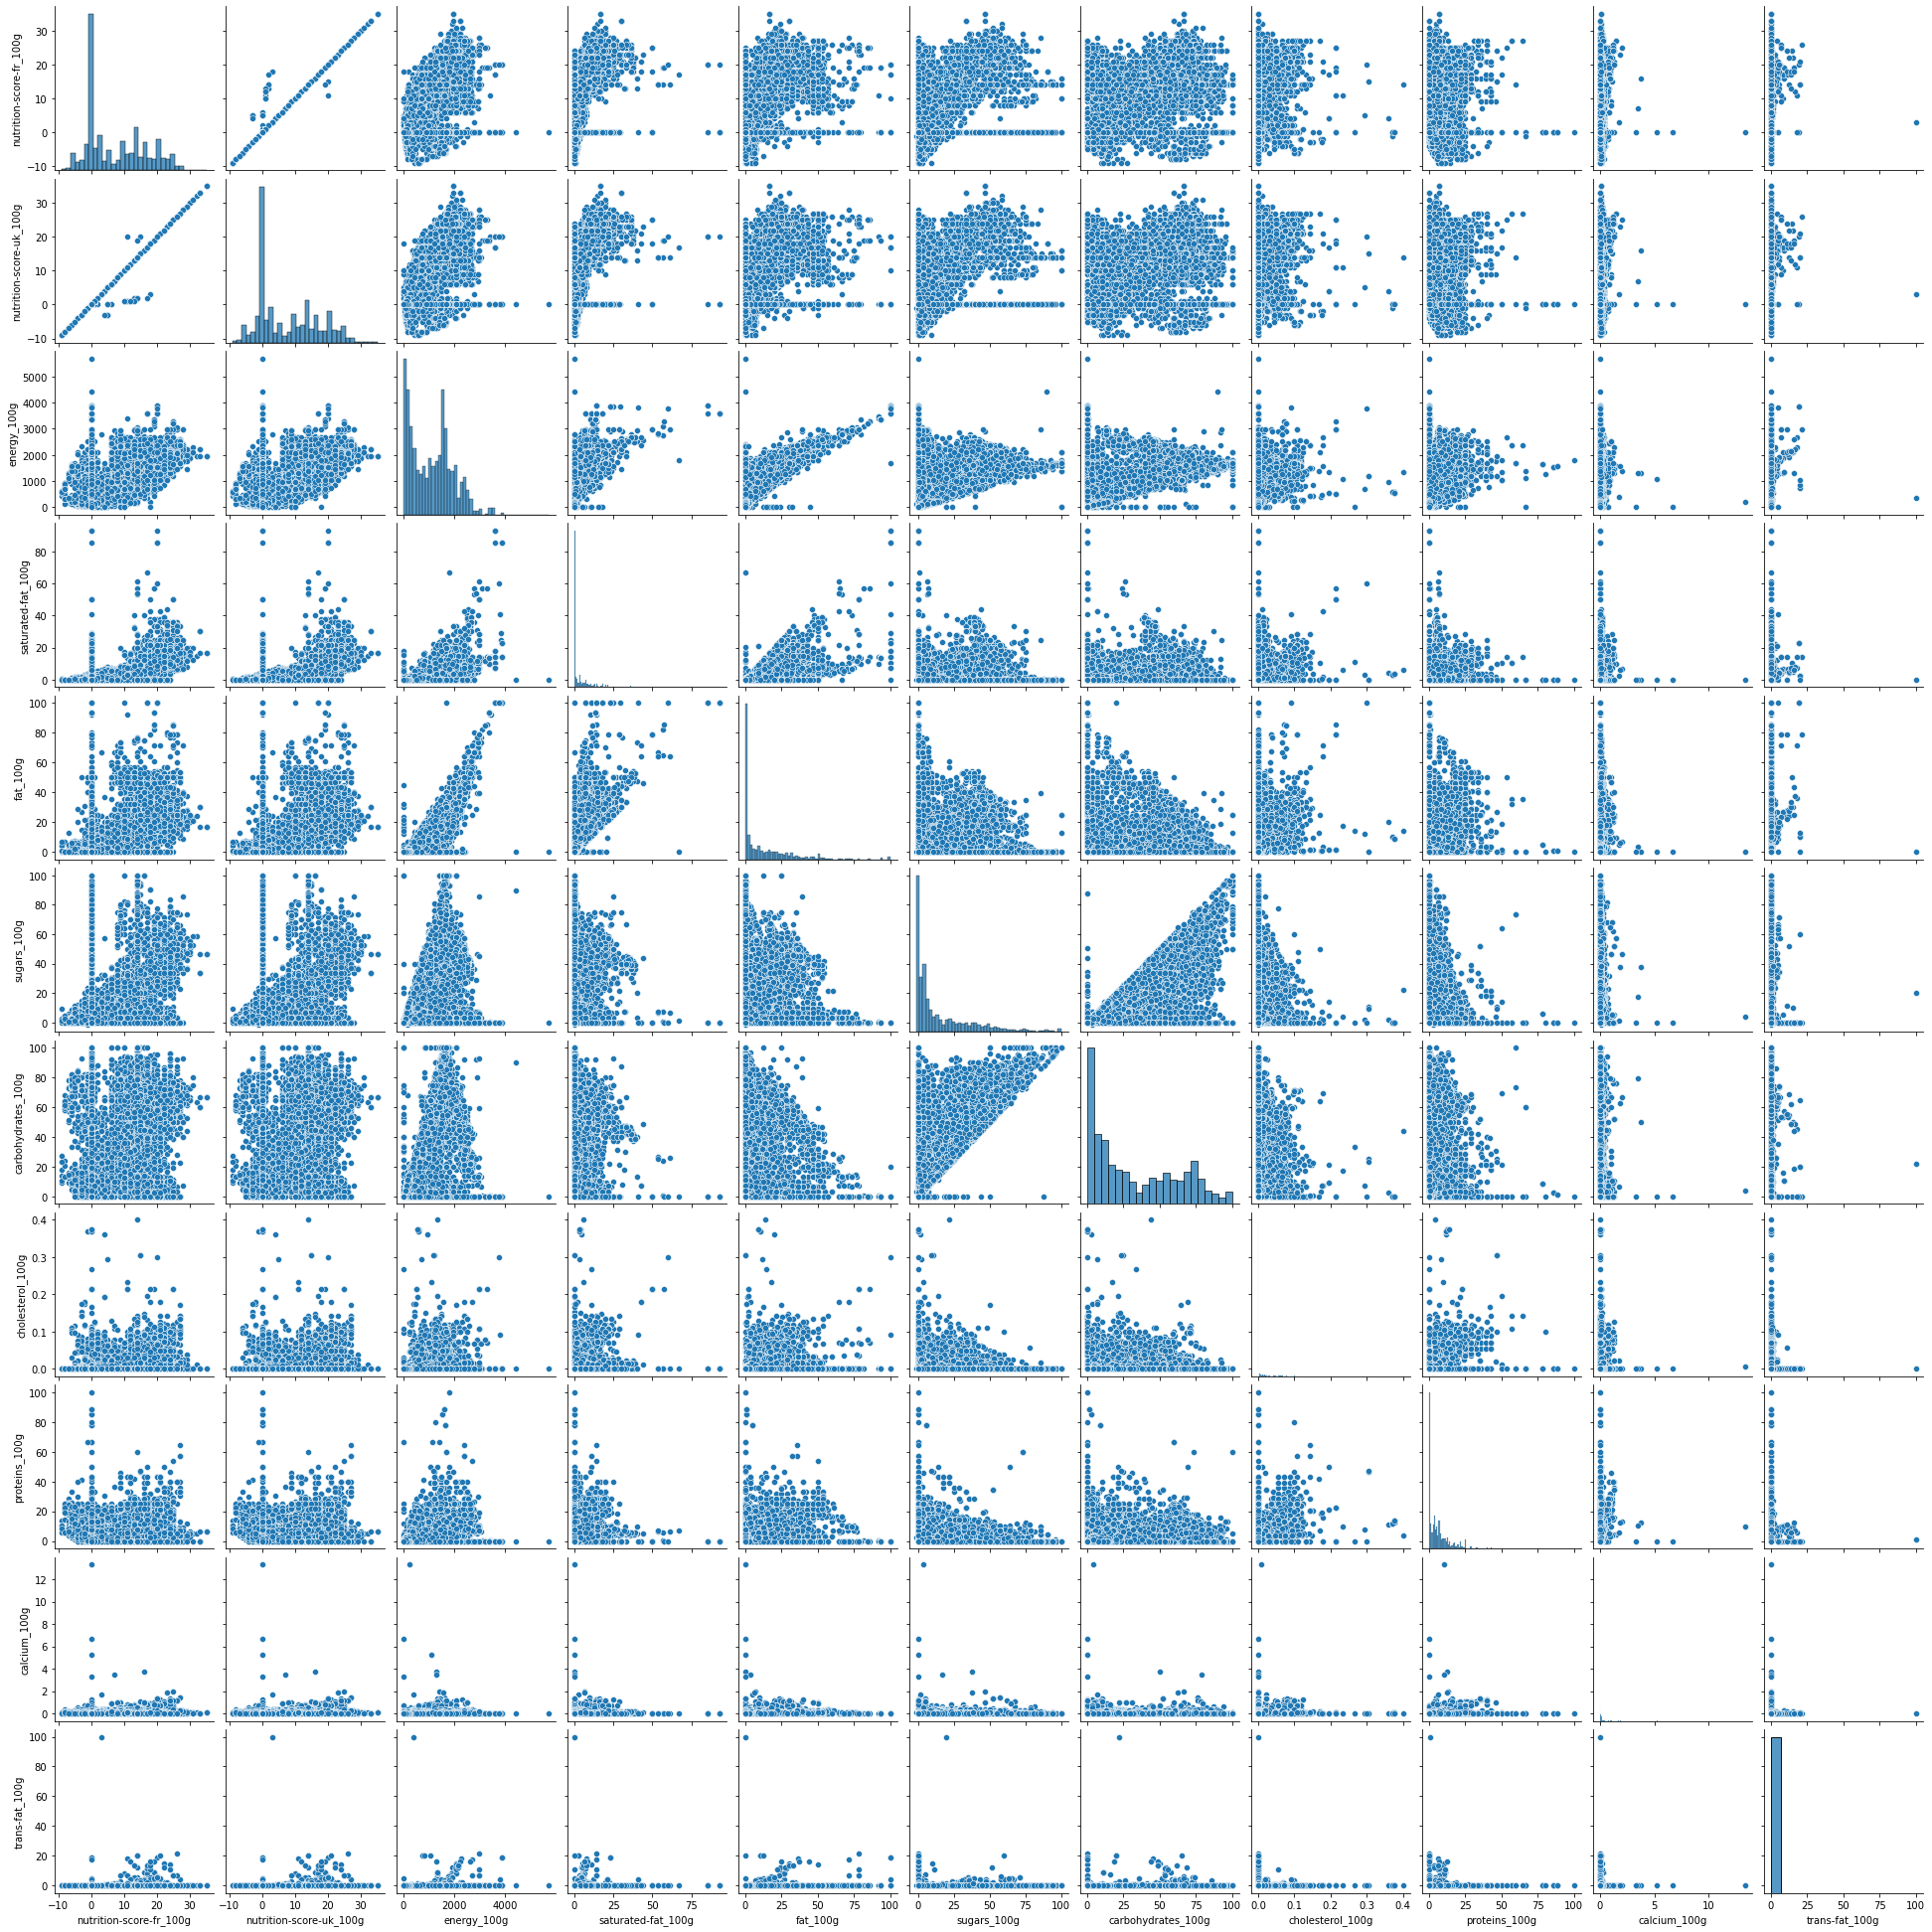

In [16]:
corr = df[['nutrition-score-fr_100g', 'nutrition-score-uk_100g', 'energy_100g',
       'saturated-fat_100g', 'fat_100g', 'sugars_100g', 'carbohydrates_100g',
       'cholesterol_100g', 'proteins_100g', 'calcium_100g', 'trans-fat_100g']]
sns.pairplot(corr)

<AxesSubplot:>

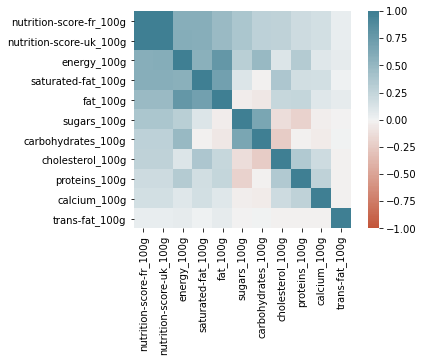

In [17]:
sns.heatmap(data=corr.corr(), vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200), square=True)

In [20]:
fat = df[['saturated-fat_100g', 'fat_100g']]
fat.head()

,saturated-fat_100g,fat_100g
0,0.00,0.00
1,28.57,28.57
2,0.00,17.86
3,5.36,57.14
4,0.00,1.43


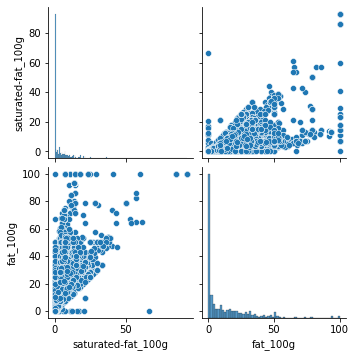

In [21]:
sns.pairplot(fat)